# Short Skimage Tutorial

This is a very short introduction to the [Scikit-image library](https://scikit-image.org/docs/stable/user_guide.html), including the main operations for image manipulation.

What is an image? Images are n-dimensional arrays where each element corresponds to a pixel. 

Images manipulated by the Scikit-image library are stored as Numpy arrays.

 See [A crash course on NumPy for images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-indexing) for more information.
 
 The most common [image types](https://scikit-image.org/docs/stable/user_guide/data_types.html) are:

a) grey-level images containing 1 channel of X rows and Y columns.

b) RGB /color images containing 3 channels per color (RGB) where each channel/plane is formed by X rows and Y columns.

## How to create an image?

In [1]:
import numpy as np

image=np.zeros((10,20))
print(image[0,1]) #check the pixel value
print(image.shape)
print(image.size)
print(image.dtype)

0.0
(10, 20)
200
float64


In [2]:
import numpy as np
x = np.float32(1.0) #creating a variabe of type float32
print(x)

1.0


In [3]:
y = np.int_([1,2,4])  #creating an array of type int64
print(y)
print(y.dtype)

[1 2 4]
int32


In [4]:
z = np.arange(3, dtype=np.uint8)  #creating an array of type uint8
print(z)
print(z.dtype)

[0 1 2]
uint8


In [5]:
z = np.zeros((3, 4), dtype=np.uint8)  #creating a bidimensional array of type uint8
print(z)
print(z.dtype) #es una imagen con escala de grises

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
uint8


Exercise: Create an image of type uint8 specifying its pixel values.

In [6]:
ii=np.array([[0, 0, 0],[255,255,255]], dtype=np.uint8)
print(ii)

[[  0   0   0]
 [255 255 255]]


## How to visualize the image?

In [7]:
import matplotlib.pyplot as plt

plt.imshow(ii)
plt.show()

plt.imshow(ii, cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

## Creating a color image

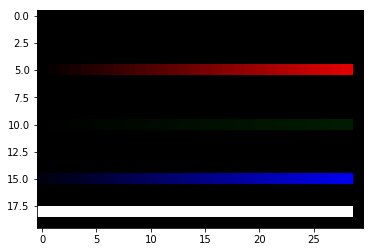

In [8]:
ii=np.zeros((20,30,3), dtype=np.uint8)  #tres canales rgb

ii[5,0:29,0]=8*np.arange(29) #linea roja
ii[10,0:29,1]=np.arange(29) #linea verde
ii[15,0:29,2]=8*np.arange(29)+15 #linea azul

ii[18,0:29,:]=[255,255,255]

plt.imshow(ii)

## Reading and writing images

Utilities to read and write images in various formats are available in the Module `io`.

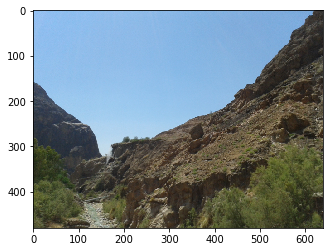

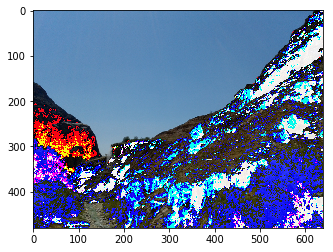

In [9]:
from skimage import io #necessary to read and write images

img = io.imread('images/jordan.jpeg') #io->leer,guardar o visualizar imagenes

plt.imshow(img) #Visualizing a figure with the image
plt.show() 

img2 = img-50 # como nos da un numero negativo, nos salen unos colores extraños, muy distintos a los reales
plt.imshow(img2)
io.imsave('images/dark_image.bmp',img2)#guardar una imagen poniendole la direccion y el array

**Exercise**: Visualize the image you just stored on the disk.
Can you explain what happened?

Scikit-image provides a set of [standard test images](http://scikit-image.org/docs/dev/api/skimage.data.html?highlight=imread#skimage.data.imread) in the Module `data`: astronaut, binary_blobs, camera, checkerboard, chelsea, clock, coffee, coins, etc.

<class 'numpy.ndarray'>
(512, 512)
262144


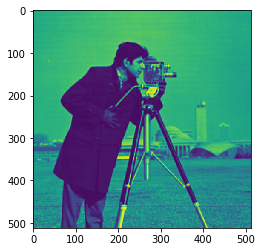

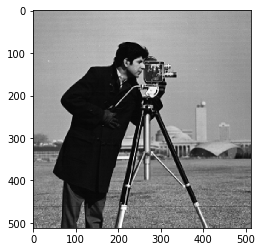

In [10]:
from skimage import data

camera = data.camera()
print(type(camera))
print(camera.shape) #tamaño
print(camera.size)
plt.imshow(camera)
plt.show()
plt.imshow(camera, cmap='gray') # we can visualize the image 'camera' in gray scale colormap, 
                                #you can look at matplotlib for different colormaps
plt.show()

## Basic image manipulation

NumPy arrays representing images can be of different numerical types, such as integer or float. 

See [Image data types and what they mean](http://scikit-image.org/docs/dev/user_guide/data_types.html#data-types) for more information about these types and how scikit-image treats them.

How shall we change the type of an image?

In [11]:
from skimage import img_as_float
import numpy as np

image = np.arange(0, 50, 10, dtype=np.uint8) # arange function defines a vector from 0 to 50 in steps of 10.
print(image)


[ 0 10 20 30 40]


What is the difference between the two following operations?

In [12]:
print(image.astype(float))
print(img_as_float(image)) #pasa a valores del 0 al 1

[ 0. 10. 20. 30. 40.]
[0.         0.03921569 0.07843137 0.11764706 0.15686275]


Can you explain the following code?

In [13]:
image.astype(float)[2]=5
im1=image.astype(float)
im1[2]=100
print("im1[2]: ",im1[2])
print("image[2]: ", image[2])
img_as_float(image)[2]=0.5
print("image[2]: ", image[2])

im1[2]:  100.0
image[2]:  20
image[2]:  20


How to convert an image from `uint8` to `float`? And from `float` to `uint8`?

## Color (RGB) images

A color image is a NumPy array, with an additional trailing dimension for the channels. See [Scikit-image Color images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#color-images) for more information.

<class 'numpy.ndarray'>
(300, 451, 3)


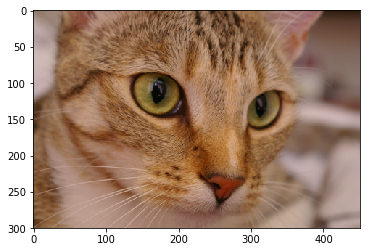

In [14]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)
plt.show()

Remember the way `numpy` allows us to index certain positions in a matrix. If we have a matrix `M`, we can access to a certain pixel `(i,j)` using the command `M[i,j]`, where `i` is the row and `j` the column. In order to index all the positions, we have to use the character `:`.

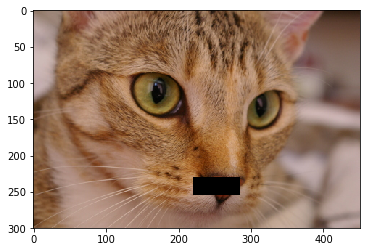

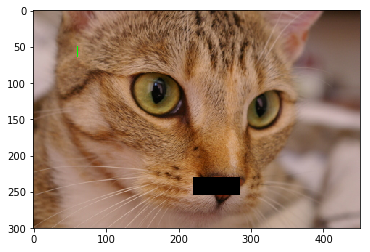

In [15]:
cat[230:255, 220:285] = 0 # set the pixels at rows from 230 to 255, columns from 220 to 285 to black
plt.imshow(cat)
plt.show()

cat[50:65, 61] = [0, 255, 0] # set the pixel at row 50, column 61 to green; remember [red, green, blue]
plt.imshow(cat)
plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]
 [False False False ...  True  True  True]]


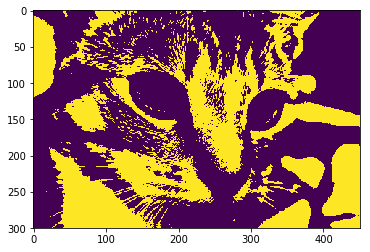

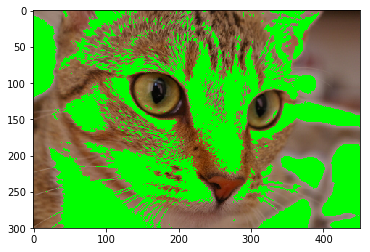

In [16]:
#tomamos el canal rojo del gato y construimos una imagen binaria
cat = data.chelsea()
reddish = cat[:, :, 0] > 160
print(reddish)
plt.imshow(reddish)
plt.show()

cat[reddish] = [0, 255, 0]
plt.imshow(cat)
plt.show()

Note that it is always much faster to iterate on the rightmost indices. See the following example:

In [17]:
def in_order_multiply(arr, scalar):
     for plane in range(arr.shape[0]):
         arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
     for plane in range(arr.shape[2]):
         arr[:, :, plane] *= scalar

import time
im3d = np.random.rand(100, 1024, 1024)
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()

print("%.2f seconds" % (t1 - t0))  

im3d_t = np.transpose(im3d).copy() # place "planes" dimension at end
im3d_t.shape
s0 = time.time(); x = out_of_order_multiply(im3d, 5); s1 = time.time()

print("%.2f seconds" % (s1 - s0))  
print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  

0.15 seconds
2.41 seconds
Speedup: 16.3x


Addendum to dimension names and orders in Scikit-image:

Image type: 2D color video       
Coordinates: (t, row, col, ch)

## Image adjustment: transforming image content


### Color manipulation

Most functions for manipulating color channels are found in the Module `color`. See [Scikit-image Color manipulation](http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html) for more information.

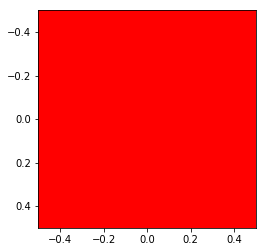

(1, 1, 3)


In [18]:
from skimage import color

#creación de un unico pixel

# bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8) #tiene los tres canales
plt.imshow(red_pixel_rgb)
plt.show()
print(red_pixel_rgb.shape)


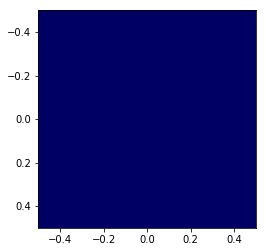

(1, 1, 3)


In [19]:
# darker saturated blue
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
plt.imshow(dark_blue_pixel_rgb)
plt.show()
print(dark_blue_pixel_rgb.shape)


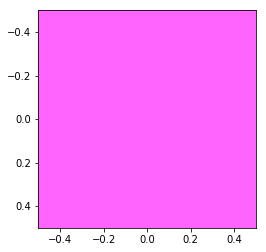

In [20]:
# less saturated pink
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
plt.imshow(pink_pixel_rgb)
plt.show()
